In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfinv
from scipy.stats import norm
import cv2 as cv
#%run xpcs.ipynb

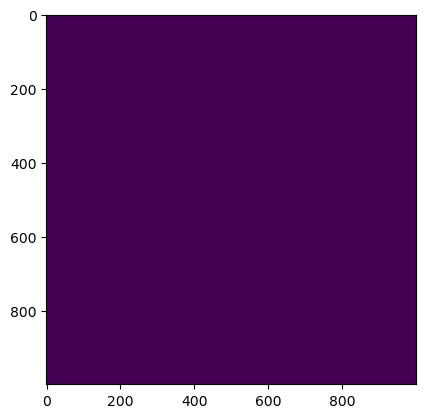

In [11]:
dim = 1000

box = np.zeros((dim,dim))

New = cv.ellipse(box,(dim//2,dim//2),(dim//20,dim//10),45,0,360,(0,255,0),-1)
plt.imshow(New)

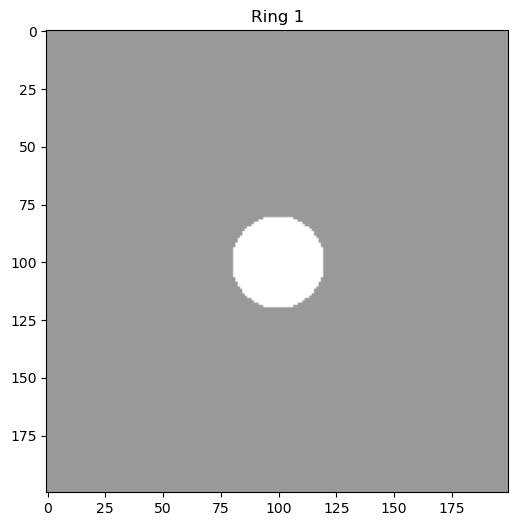

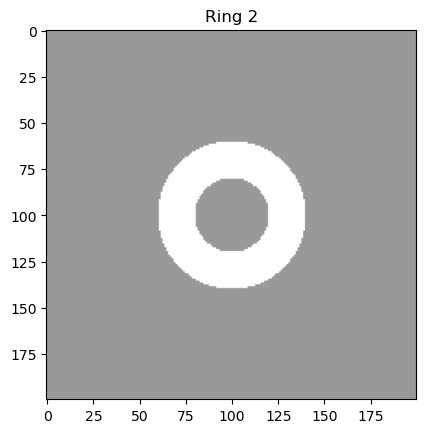

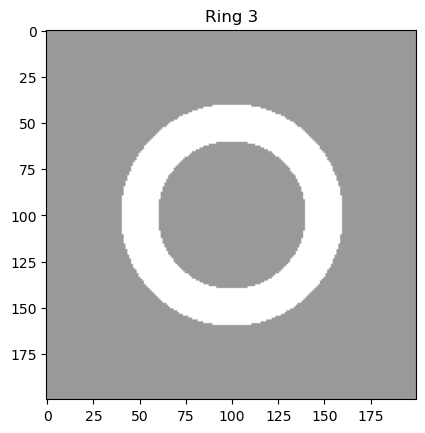

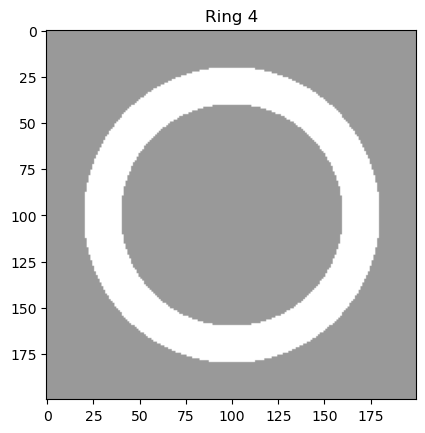

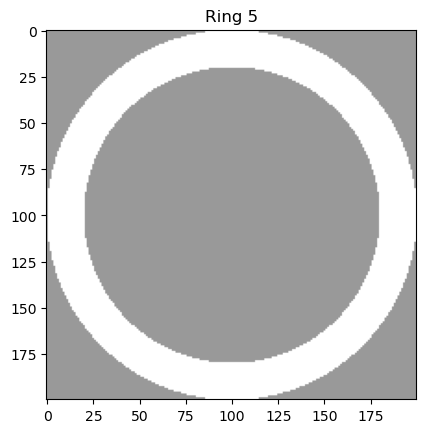

In [2]:
# Example parameters
height, width = 200, 200  # Image dimensions
center = (height // 2, width // 2)  # Center of the image
num_rings = 5  # Number of concentric rings

# Create a grid of coordinates
y, x = np.ogrid[:height, :width]

# Calculate the distance of each pixel from the center
distance_from_center = np.sqrt((x - center[1])**2 + (y - center[0])**2)

# Define the boundaries for the rings
ring_width = (min(height, width) // 2) / num_rings  # Width of each ring
rings = []

for i in range(num_rings):
    inner_radius = i * ring_width
    outer_radius = (i + 1) * ring_width
    # Create a mask for each ring
    ring_mask = (distance_from_center >= inner_radius) & (distance_from_center < outer_radius)
    rings.append(ring_mask)

# Visualization
plt.figure(figsize=(6, 6))
for i, ring in enumerate(rings):
    plt.imshow(ring, alpha=0.4, cmap='gray')
    plt.title(f"Ring {i + 1}")
    plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Example parameters
height, width = 200, 200  # Image dimensions
center = (height // 2, width // 2)  # Center of the image
num_rings = 3  # Number of elliptical rings
num_slices = 8  # Number of angular segments (pizza slices)
major_axis = 80  # Length of the semi-major axis of the ellipse
minor_axis = 50  # Length of the semi-minor axis of the ellipse

# Create a grid of coordinates
y, x = np.ogrid[:height, :width]

# Calculate the elliptical distance from the center
elliptical_distance = np.sqrt(((x - center[1]) / major_axis)**2 + ((y - center[0]) / minor_axis)**2)

# Calculate the angle of each pixel relative to the center
angle_from_center = np.arctan2(y - center[0], x - center[1])  # Angle in radians
angle_from_center = (angle_from_center + 2 * np.pi) % (2 * np.pi)  # Normalize to [0, 2*pi)

# Define the boundaries for the elliptical rings
ring_width = 1.0 / num_rings  # Each ring will occupy a fraction of the elliptical distance range
roi_mask = np.zeros((num_rings*num_slices,height, width))  # Create a blank mask for all ROIs

# Assign each ROI a unique index for visualization
roi_index = 1

for i in range(num_rings):
    inner_radius = i * ring_width
    outer_radius = (i + 1) * ring_width
    # Create a mask for each elliptical ring
    ring_mask = (elliptical_distance >= inner_radius) & (elliptical_distance < outer_radius)
    for j in range(num_slices):
        # Define angular boundaries for each segment
        start_angle = j * (2 * np.pi / num_slices)
        end_angle = (j + 1) * (2 * np.pi / num_slices)
        # Create a mask for each angular segment
        slice_mask = (angle_from_center >= start_angle) & (angle_from_center < end_angle)
        # Combine the elliptical ring mask and slice mask
        combined_mask = ring_mask & slice_mask
        # Assign a unique value to each region for visualization
        roi_mask[roi_index-1,combined_mask] = roi_index
        roi_index += 1

'''''''''
# Visualization
cmap = plt.cm.get_cmap('tab20', roi_index)  # Use a colormap with enough colors for all segments
plt.figure(figsize=(6, 6))
plt.imshow(roi_mask, cmap=cmap)
plt.colorbar(label='ROI Index')
plt.title('Elliptical Rings with Angular Segments (ROIs)')
plt.axis('off')
plt.show()
'''''''''


"\n# Visualization\ncmap = plt.cm.get_cmap('tab20', roi_index)  # Use a colormap with enough colors for all segments\nplt.figure(figsize=(6, 6))\nplt.imshow(roi_mask, cmap=cmap)\nplt.colorbar(label='ROI Index')\nplt.title('Elliptical Rings with Angular Segments (ROIs)')\nplt.axis('off')\nplt.show()\n"

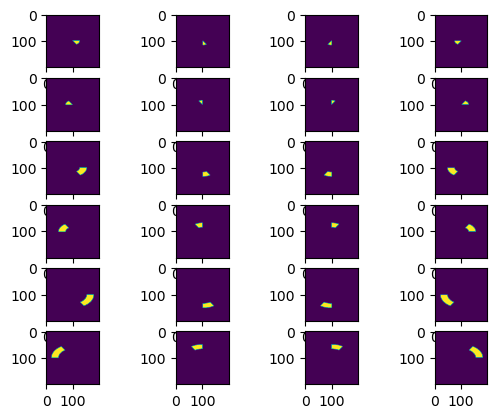

In [39]:
fig,axes = plt.subplots(6,roi_mask.shape[0]//6)
for ax,image in zip(axes.flat,roi_mask):
    ax.imshow(image)
plt.show()

In [40]:
numRings = 5
probs = np.append(np.arange(1/numRings,1,1/numRings),0.99998)
print(probs)
erfinv(probs)

[0.2     0.4     0.6     0.8     0.99998]


array([0.17914345, 0.37080716, 0.59511608, 0.9061938 , 3.0157332 ])

In [48]:
height,width = 1000,500

center = (height//2,width//2)

y, x = np.ogrid[:height, :width]


elliptical_distance = np.sqrt(((x - center[1]) / 100)**2 + ((y - center[0]) / 200)**2)


print(elliptical_distance[center[0]+2,center[1]])

0.01
